In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:

df = pd.read_csv('placement.csv')

In [53]:

df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

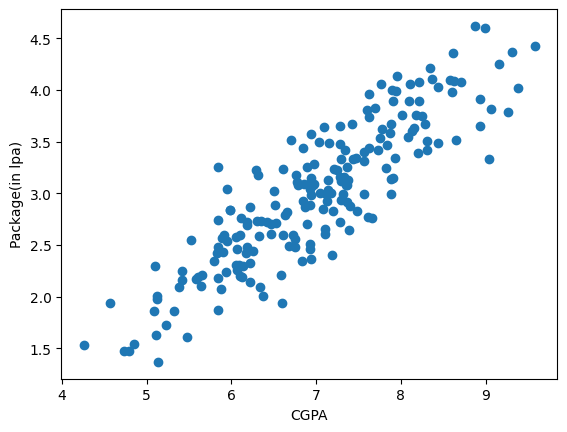

In [54]:

plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [55]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [56]:

y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [57]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:

lr = LinearRegression()

In [60]:

lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

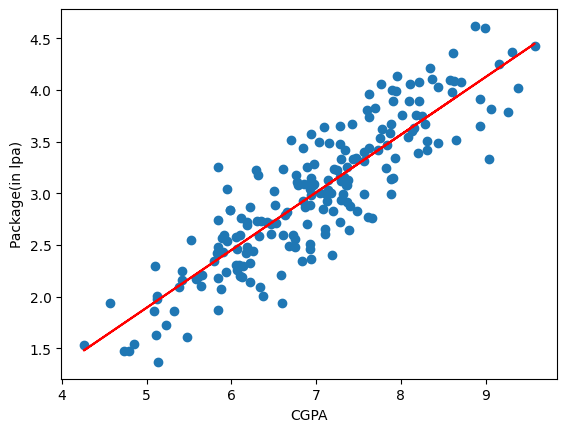

In [61]:

plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [63]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [64]:

y_pred = lr.predict(X_test)

In [65]:

y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

## **MAE= E  |Y-Mean(Y)| / n**
* differentiable at 0 Biggest disavantage due to Modulus function
* Outlier handling can be handle ,  Biggest avantage due to Modulus function

In [66]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


## **MSE= E  (Y - Mean(Y)) ^ 2 / n**

* differentiable at 0 Biggest avantage due to square function
* Outlier handling cant be done ,Biggest disavantage due to square function

In [67]:

print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


## **RMSE = (E  (Y - Mean(Y)) ^ 2 / n) ^1/2**

* differentiable at 0 Biggest avantage due to square root  function
* Outlier handling cant be done ,Biggest disavantage due to square function
* Advantage , it help to remain the same unit

In [68]:

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [69]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [70]:

# Adjusted R2 score
X_test.shape

(40, 1)

In [71]:

1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

# **Second time**

In [72]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.721862,3.26
1,5.12,0.590649,1.98
2,7.82,0.267724,3.25
3,7.42,0.426971,3.67
4,6.94,0.822528,3.57


Text(0, 0.5, 'Package(in lpa)')

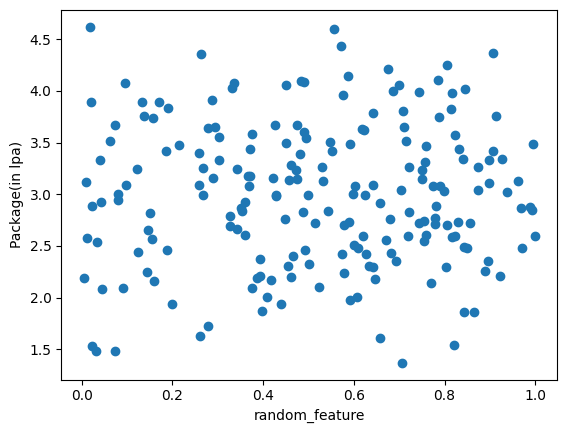

In [73]:

plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [74]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:

lr = LinearRegression()

In [77]:

lr.fit(X_train,y_train)

LinearRegression()

In [78]:

y_pred = lr.predict(X_test)

In [79]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7764332505779102


In [80]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.7643485614199594

# **Third time**

In [81]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [82]:

new_df2.sample(5)

,cgpa,iq,package
29,7.15,4.59,3.49
26,8.31,2.32,3.42
122,5.12,1.91,2.01
20,7.28,2.86,3.16
186,7.84,2.47,3.47


Text(0, 0.5, 'Package(in lpa)')

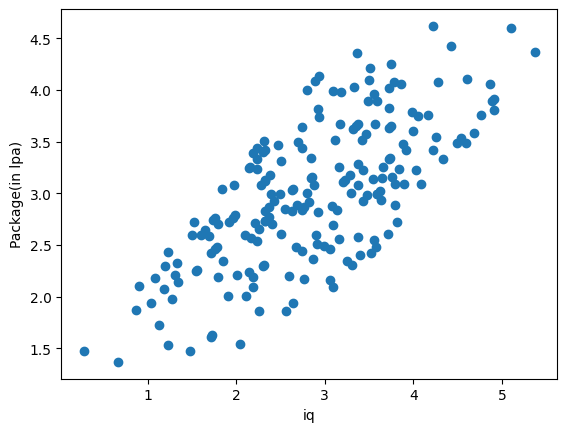

In [83]:

plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [84]:

np.random.randint(-100,100)

-92

In [85]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [88]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8281511477730596


In [89]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.8188620206256575